In [3]:
import cv2
import sys, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

### Load meta data file including age

In [16]:
metaFile="/Users/markus/Work/data/wiki/wiki_meta.csv"
meta = pd.read_csv(metaFile)

print(meta.shape)
print(sum(meta.face_score<0))
meta.head(3)

(62328, 8)
18016


,full_path,dob,face_location,face_score,gender,photo_taken,second_face_score,age
0,17/10000217_1981-05-05_2009.jpg,723671,111.291 111.291 252.67 252.67,4.3010,1.0,2009,NaN,28
1,48/10000548_1925-04-04_1964.jpg,703186,252.483 126.682 354.532 228.73,2.6456,1.0,1964,1.9492,39
2,12/100012_1948-07-03_2008.jpg,711677,113.52 169.84 366.08 422.4,4.3293,1.0,2008,NaN,59


In [17]:
# clean table
idx = meta.face_score<0
print("Low face score: {}".format(sum(idx)))
meta=meta[~idx]

idx = ~meta.second_face_score.isnull()
print("Two faces: {}".format(sum(idx)))
meta=meta[~idx]

idx = meta.age<1
print("Low age: {}".format(sum(idx)))
meta=meta[~idx]

idx = meta.age>120
print("High age: {}".format(sum(idx)))
meta=meta[~idx]

print(meta.shape)

Low face score: 18016
Two faces: 4096
Low age: 8
High age: 18
(40190, 8)


In [18]:
meta.sort_values(by='full_path',inplace=True)
meta.reset_index(drop=True,inplace=True)
meta.head(10)

,full_path,dob,face_location,face_score,gender,photo_taken,second_face_score,age
0,00/10049200_1891-09-16_1958.jpg,690933,126.869 111.111 267.897 252.138,5.2548,0.0,1958,NaN,66
1,00/10110600_1985-09-17_2012.jpg,725267,217.681 129.039 305.324 216.681,3.6931,1.0,2012,NaN,26
2,00/1013900_1917-10-15_1960.jpg,700458,80.871 90.9204 170.839 180.889,4.1361,1.0,1960,NaN,42
3,00/10166400_1960-03-12_2008.jpg,715947,40.7043 120.353 398.243 477.891,3.8709,1.0,2008,NaN,48
4,00/1024100_1982-06-07_2011.jpg,724069,315.84 62.4 384 130.56,3.2003,1.0,2011,NaN,29
5,00/10292500_1984-03-26_2009.jpg,724727,269.565 44.2163 346.69 121.342,3.2169,1.0,2009,NaN,25
6,00/1035700_1945-11-27_2013.jpg,710728,196.998 74.4241 306.434 183.86,3.3795,1.0,2013,NaN,67
7,00/10525500_1916-02-14_1951.jpg,699849,79.7026 132.251 315.291 367.839,3.8765,1.0,1951,NaN,35
8,00/10623500_1931-09-25_1956.jpg,705551,118.427 74.3167 249.957 205.847,3.9789,0.0,1956,NaN,24
9,00/10870400_1971-06-28_2013.jpg,720072,169.84 183.92 295.68 309.76,2.9951,1.0,2013,NaN,42


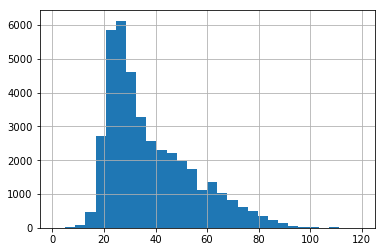

In [19]:
#meta.face_score[meta.face_score>0].hist()
meta.age.hist(bins=30)

### Add age classes/labels

In [24]:
ageBins  = [0, 18, 29, 39, 49 , 59, 131]
ageLabels = [1,2,3,4,5,6]
#test
pd.cut([0,18,19,29,30,40,50,60,130], ageBins, labels=ageLabels)

[NaN, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [31]:
meta["ageLabel"]=pd.cut(meta.age, ageBins, labels=ageLabels)
assert(any(~meta.ageLabel.isnull()))
meta.head(3)

,full_path,dob,face_location,face_score,gender,photo_taken,second_face_score,age,ageLabel
0,00/10049200_1891-09-16_1958.jpg,690933,126.869 111.111 267.897 252.138,5.2548,0.0,1958,NaN,66,6
1,00/10110600_1985-09-17_2012.jpg,725267,217.681 129.039 305.324 216.681,3.6931,1.0,2012,NaN,26,2
2,00/1013900_1917-10-15_1960.jpg,700458,80.871 90.9204 170.839 180.889,4.1361,1.0,1960,NaN,42,4


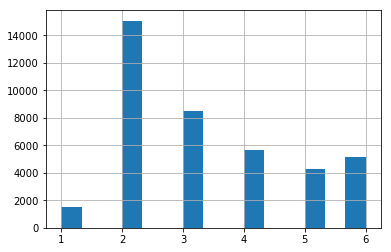

In [35]:
meta.ageLabel.hist(bins=15)

In [36]:
meta.to_pickle("wiki_meta_clean.pkl")

In [13]:
meta[meta.ageLabel.isnull()]

,full_path,dob,face_location,face_score,gender,photo_taken,second_face_score,age,ageLabel
19453,48/26614448_1940-04-30_1940.jpg,708691,63.244 84.108 250.368 271.232,5.6453,1.0,1940,NaN,0,NaN
27265,67/45274267_2002-04-12_2002.jpg,731318,37.352 67.048 103.936 117.16,3.0566,NaN,2002,NaN,0,NaN
